# Logan T Hernandez

## Research question/interests

**My part of the project will be exploring the change in housing prices, new housing construction, and population of canadian metropolitan areas over time.**

My research question is related to the change in available housing, cost, and population of canadian metropolitan areas. I believe that everyone under 30 is worried about the state of the housing market and availability of affordable living. With this concern in mind, I plan to visualize how the market has changed over time relative to population increases of metropolitan hubs. Since hubs provide the greatest opportunity for career advancement, people who want to earn high paying jobs often relocate to hubs; however, the cost of living in the hub also dictates its affordability, with the highest C.O.L. expenditure being housing. Therefore, my analysis will also attempt to determine the most affordable canadian metropolitan hub respective of housing cost and inventory.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style='whitegrid', font_scale=2)

DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRates/DailyInterestRates.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory/NewInventory.csv", low_memory = False)
PopEstimate = pd.read_csv("../data/raw/PopEstimate/PopEstimate.csv")

In [2]:
PopEstimate.head(5)

,REF_DATE,GEO,DGUID,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001,Canada,2016A00001124,Both sexes,All ages,Persons,249,units,0,v1462635598,178.1.1,31020902.0,NaN,NaN,NaN,0
1,2001,Canada,2016A00001124,Both sexes,0 to 4 years,Persons,249,units,0,v1462635576,178.1.2,1754354.0,NaN,NaN,NaN,0
2,2001,Canada,2016A00001124,Both sexes,0 years,Persons,249,units,0,v1462635484,178.1.3,328494.0,NaN,NaN,NaN,0
3,2001,Canada,2016A00001124,Both sexes,1 year,Persons,249,units,0,v1462635485,178.1.4,345259.0,NaN,NaN,NaN,0
4,2001,Canada,2016A00001124,Both sexes,2 years,Persons,249,units,0,v1462635486,178.1.5,349563.0,NaN,NaN,NaN,0


## Data Wrangling
Theres quite a few columns here that are going to be erraneous for my analysis, so I'm first going to drop the columns that are not directly related to the general geographical location and to the population, and age of populants. 

In [3]:
PE_Wrangled = PopEstimate.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index().drop(columns=["index"])
PE_Wrangled.sample(10)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
19876,2001,"Campbellton (CA), Quebec part, Quebec",Males,79 years,Persons,2.0
1093204,2018,"Penticton (CA), British Columbia",Females,10 years,Persons,182.0
172894,2003,"Kamloops (CA), British Columbia",Both sexes,40 to 44 years,Persons,7869.0
1055975,2018,"Calgary (CMA), Alberta",Females,36 years,Persons,13050.0
1027553,2017,"Strathmore (CA), Alberta",Males,22 years,Persons,90.0
123640,2003,"All census metropolitan areas, Canada",Males,11 years,Persons,145956.0
909952,2015,"Kamloops (CA), British Columbia",Males,59 years,Persons,801.0
1118035,2019,"Kelowna (CMA), British Columbia",Females,3 years,Persons,969.0
1316530,2022,"Val-d'Or (CA), Quebec",Both sexes,7 years,Persons,398.0
451927,2008,"Dolbeau-Mistassini (CA), Quebec",Females,75 years,Persons,68.0


This is a lot more concise already, and only includes values explicitly related to my analysis. Interestingly, the unit of measurement (UOM) column provides an additional level of data formatting that i can utilize later, as it will allow me to filter the data by average ages. I'm not sure if I will use this yet, however the analysis to do so will simply filter the wrangled dataset by UOM value == Persons or years. The same filter can be applied by using the age group category, however it will provide more explicit filtration as this category also inlcudes all age groups of each city's population. As for now, I will conduct some additional exploratory analysis using plots. 

## Visual EDA

I think a good place to start will be constructing a boxplot showing the total population counts relative to the geographical area. Geographical area will be on the y plane to avoid formatting issues.

In [4]:
PE_GB_GEO = PE_Wrangled.groupby('GEO').sum().reset_index().sort_values(by=['VALUE'], ascending=False)
PE_GB_GEO.head(20)

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_33232/188684402.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PE_GB_GEO = PE_Wrangled.groupby('GEO').sum().reset_index().sort_values(by=['VALUE'], ascending=False)


,GEO,REF_DATE,VALUE
35,Canada,15267285,6.088087e+09
3,All census metropolitan areas and census agglo...,15267285,5.033420e+09
4,"All census metropolitan areas, Canada",15267285,4.283533e+09
1,All areas outside census metropolitan areas an...,15267285,1.054672e+09
158,"Toronto (CMA), Ontario",15267285,1.017752e+09
2,"All census agglomerations, Canada",15267285,7.498925e+08
95,"Montréal (CMA), Quebec",15267285,7.036907e+08
162,"Vancouver (CMA), British Columbia",15267285,4.241699e+08
16,Area outside census metropolitan areas and cen...,15267285,2.706236e+08
14,Area outside census metropolitan areas and cen...,15267285,2.490646e+08


This provides us with a brief description of the largest metropolitan areas in canada during the past 20 years on a combined value of total population summation from each year. Now, Ill start dropping the useless rows. First off, I'll drop 'Canada' and all other aggregated rows.

In [5]:
PE_ordered_filtered = PE_GB_GEO.drop(PE_GB_GEO[PE_GB_GEO.GEO.isin(['Canada',
                                                                'All areas outside census metropolitan areas and census agglomerations, Canada',
                                                                'All census agglomerations, Canada',
                                                                'All census metropolitan areas and census agglomerations, Canada',
                                                                'All census metropolitan areas, Canada','Area outside census metropolitan areas and census agglomerations, Alberta',
                                                                'Area outside census metropolitan areas and census agglomerations, British Columbia',
                                                                'Area outside census metropolitan areas and census agglomerations, Manitoba',
                                                                'Area outside census metropolitan areas and census agglomerations, New Brunswick',
                                                                'Area outside census metropolitan areas and census agglomerations, Newfoundland and Labrador',
                                                                'Area outside census metropolitan areas and census agglomerations, Northwest Territories',
                                                                'Area outside census metropolitan areas and census agglomerations, Nova Scotia',
                                                                'Area outside census metropolitan areas and census agglomerations, Nunavut',
                                                                'Area outside census metropolitan areas and census agglomerations, Ontario',
                                                                'Area outside census metropolitan areas and census agglomerations, Prince Edward Island',
                                                                'Area outside census metropolitan areas and census agglomerations, Quebec',
                                                                'Area outside census metropolitan areas and census agglomerations, Saskatchewan',
                                                                'Area outside census metropolitan areas and census agglomerations, Yukon',
                                                                'Ottawa - Gatineau (CMA), Ontario part, Ontario',
                                                                'Ottawa - Gatineau (CMA), Quebec part, Quebec'])].index).head(30).reset_index().drop(columns=["index"])
PE_ordered_filtered

,GEO,REF_DATE,VALUE
0,"Toronto (CMA), Ontario",15267285,1.017752e+09
1,"Montréal (CMA), Quebec",15267285,7.036907e+08
2,"Vancouver (CMA), British Columbia",15267285,4.241699e+08
3,"Ottawa - Gatineau (CMA), Ontario/Quebec",15267285,2.278083e+08
4,"Calgary (CMA), Alberta",15267285,2.269135e+08
5,"Edmonton (CMA), Alberta",15267285,2.165584e+08
6,"Québec (CMA), Quebec",15267285,1.360221e+08
7,"Winnipeg (CMA), Manitoba",15267285,1.345632e+08
8,"Hamilton (CMA), Ontario",15267285,1.316121e+08
9,"Kitchener - Cambridge - Waterloo (CMA), Ontario",15267285,9.163376e+07


Great, now I can visualize the 30 largest metropolitan areas in Canada from their combined population counts for the past 20 years. These are the locations that I will assess in my analysis of housing inventory and price index. 


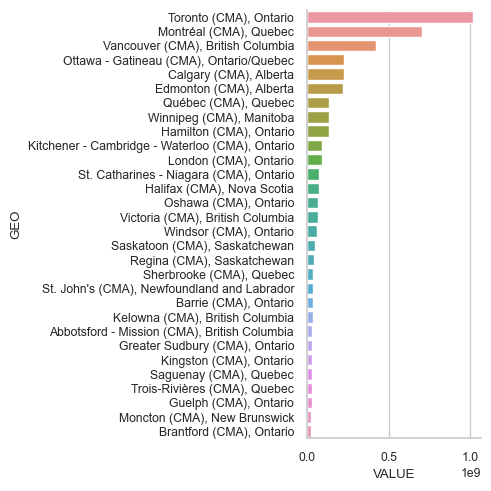

In [6]:
sns.set_theme(style='whitegrid', font_scale=0.8)
sns.catplot(data=PE_ordered_filtered, y='GEO', x='VALUE', kind='bar')
n=None

In [7]:
NewHousingPIndex.sample(10)

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
40615,2009-03,"Oshawa, Ontario",2011S0503532,House only,"Index, 201612=100",347,units,0,v111955497,19.2,NaN,..,NaN,NaN,1
45627,2012-09,"Saint John, Fredericton, and Moncton, New Brun...",NaN,Total (house and land),"Index, 201612=100",347,units,0,v111955469,10.1,98.3,NaN,NaN,NaN,1
31889,2003-02,"Winnipeg, Manitoba",2011S0503602,Land only,"Index, 201612=100",347,units,0,v111955531,30.3,35.6,E,NaN,NaN,1
22380,1996-07,"Hamilton, Ontario",2011S0503537,Total (house and land),"Index, 201612=100",347,units,0,v111955502,21.1,53.7,NaN,NaN,NaN,1
50511,2016-01,"Kelowna, British Columbia",2011S0503915,Total (house and land),"Index, 201612=100",347,units,0,v111955553,38.1,NaN,..,NaN,NaN,1
2448,1982-09,Ontario,2016A000235,Total (house and land),"Index, 201612=100",347,units,0,v111955490,17.1,NaN,..,NaN,NaN,1
31896,2003-02,"Saskatoon, Saskatchewan",2011S0503725,Total (house and land),"Index, 201612=100",347,units,0,v111955538,33.1,48.2,NaN,NaN,NaN,1
30127,2001-12,Newfoundland and Labrador,2016A000210,House only,"Index, 201612=100",347,units,0,v111955449,3.2,52.5,NaN,NaN,NaN,1
14821,1991-04,"Hamilton, Ontario",2011S0503537,House only,"Index, 201612=100",347,units,0,v111955503,21.2,51.3,NaN,NaN,NaN,1
50908,2016-05,"Saint John, Fredericton, and Moncton, New Brun...",NaN,House only,"Index, 201612=100",347,units,0,v111955470,10.2,98.0,NaN,NaN,NaN,1


## Data Wrangling

Similar to before, there's quite a few columns here that are going to be erraneous for my analysis, so I'm first going to drop the columns that are not directly related to the general geographical location and to the housing price.

In [8]:
NewHousingPIndex_Wrangled = NewHousingPIndex.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index().drop(columns=["index"]) 
NewHousingPIndex_Wrangled

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,1981-01,Canada,Total (house and land),"Index, 201612=100",38.2
1,1981-01,Canada,House only,"Index, 201612=100",36.1
2,1981-01,Canada,Land only,"Index, 201612=100",40.6
3,1981-01,Atlantic Region,Total (house and land),"Index, 201612=100",NaN
4,1981-01,Atlantic Region,House only,"Index, 201612=100",NaN
...,...,...,...,...,...
60475,2022-12,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
60476,2022-12,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
60477,2022-12,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
60478,2022-12,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


This is looking better, however there's way too much data compared to what I need for the analysis. My population estimates start in 2001, so I'm going to drop all data for the housing price index prior to 2001 after I ensure that the dates are correctly displayed in datetime format. 

In [9]:
NewHousingPIndex_Wrangled['REF_DATE'] = pd.to_datetime(NewHousingPIndex_Wrangled['REF_DATE'])

NHPI_W_v2 = NewHousingPIndex_Wrangled[~(NewHousingPIndex_Wrangled['REF_DATE'] < '2001-01-01')].reset_index().drop(columns=["index"])
NHPI_W_v2

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Canada,House only,"Index, 201612=100",55.5
2,2001-01-01,Canada,Land only,"Index, 201612=100",67.4
3,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
4,2001-01-01,Atlantic Region,House only,"Index, 201612=100",65.7
...,...,...,...,...,...
31675,2022-12-01,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
31676,2022-12-01,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
31677,2022-12-01,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
31678,2022-12-01,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


At this point im making a decision on the data I wish to use for the housing price, available to me are the cost of the house and the land and the combined total, I think it would be more applicable if the combined price was used as it would encompass inflation from both angles (I also will rename it as a new variable in case i go back on this decision later).

In [10]:
NHPI_W_v3 = NHPI_W_v2.drop(NHPI_W_v2[NHPI_W_v2['New housing price indexes'].isin(['House only','Land only'])].index).reset_index().drop(columns=["index"])
NHPI_W_v3

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
2,2001-01-01,Newfoundland and Labrador,Total (house and land),"Index, 201612=100",49.5
3,2001-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5
4,2001-01-01,Prince Edward Island,Total (house and land),"Index, 201612=100",85.7
...,...,...,...,...,...
10555,2022-12-01,"Edmonton, Alberta",Total (house and land),"Index, 201612=100",109.5
10556,2022-12-01,British Columbia,Total (house and land),"Index, 201612=100",127.6
10557,2022-12-01,"Kelowna, British Columbia",Total (house and land),"Index, 201612=100",123.4
10558,2022-12-01,"Vancouver, British Columbia",Total (house and land),"Index, 201612=100",128.2


Great, now I need to explore the dataset relative to GEO and make a comparison to the population data previously explored. To do this im going to transfer the sorted GEO regions of both the new housing price index and the population index to lists, then cross reference both lists to find the unique regions to each list to determine which regions I have data for. This way I can eliminate the regions with insufficent data or rename the regions if the naming style used between each set differs slightly.

In [11]:
Regions1 = sorted(NHPI_W_v3['GEO'].unique().tolist())
Regions2 = sorted(PE_ordered_filtered['GEO'].unique().tolist())
unique_to_NHPI = set(Regions1) - set(Regions2)
unique_to_PE = set(Regions2) - set(Regions1)

print(f"Unique items in NHPI:{unique_to_NHPI}")

Unique items in NHPI:{'Winnipeg, Manitoba', 'Alberta', 'Hamilton, Ontario', "St. John's, Newfoundland and Labrador", 'Vancouver, British Columbia', 'London, Ontario', 'Saint John, Fredericton, and Moncton, New Brunswick', 'Trois-Rivières, Quebec', 'Ottawa-Gatineau, Quebec part, Ontario/Quebec', 'Saskatoon, Saskatchewan', 'British Columbia', 'Windsor, Ontario', 'Nova Scotia', 'Manitoba', 'Atlantic Region', 'Greater Sudbury, Ontario', 'Ontario', 'Victoria, British Columbia', 'Kelowna, British Columbia', 'Guelph, Ontario', 'New Brunswick', 'Prince Edward Island', 'Toronto, Ontario', 'Québec, Quebec', 'Saskatchewan', 'Sherbrooke, Quebec', 'Charlottetown, Prince Edward Island', 'St. Catharines-Niagara, Ontario', 'Canada', 'Edmonton, Alberta', 'Newfoundland and Labrador', 'Ottawa-Gatineau, Ontario part, Ontario/Quebec', 'Kitchener-Cambridge-Waterloo, Ontario', 'Quebec', 'Oshawa, Ontario', 'Prairie Region', 'Halifax, Nova Scotia', 'Montréal, Quebec', 'Calgary, Alberta', 'Regina, Saskatchewan'

In [12]:
print(f"Unique items in PE:{unique_to_PE}")

Unique items in PE:{'Abbotsford - Mission (CMA), British Columbia', "St. John's (CMA), Newfoundland and Labrador", 'Montréal (CMA), Quebec', 'Brantford (CMA), Ontario', 'Saskatoon (CMA), Saskatchewan', 'Hamilton (CMA), Ontario', 'Vancouver (CMA), British Columbia', 'Sherbrooke (CMA), Quebec', 'Winnipeg (CMA), Manitoba', 'Kitchener - Cambridge - Waterloo (CMA), Ontario', 'Toronto (CMA), Ontario', 'Greater Sudbury (CMA), Ontario', 'Trois-Rivières (CMA), Quebec', 'Québec (CMA), Quebec', 'Halifax (CMA), Nova Scotia', 'Barrie (CMA), Ontario', 'Kingston (CMA), Ontario', 'Regina (CMA), Saskatchewan', 'Windsor (CMA), Ontario', 'Oshawa (CMA), Ontario', 'Calgary (CMA), Alberta', 'Guelph (CMA), Ontario', 'Edmonton (CMA), Alberta', 'London (CMA), Ontario', 'Saguenay (CMA), Quebec', 'Moncton (CMA), New Brunswick', 'St. Catharines - Niagara (CMA), Ontario', 'Victoria (CMA), British Columbia', 'Kelowna (CMA), British Columbia', 'Ottawa - Gatineau (CMA), Ontario/Quebec'}


From this comparison, I can see that most of the same areas are listed with the only difference in their names being "(CMA)" and extra space between dashes for some, I will now rename all items in the PopEstimate dataset to their proper names without the "(CMA)" or extra space

In [13]:
PE_ordered_filtered["GEO"] = PE_ordered_filtered["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()
PE_ordered_filtered.to_csv("../data/processed/PE_ordered_filtered.csv")
PE_ordered_filtered

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_33232/1648971501.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  PE_ordered_filtered["GEO"] = PE_ordered_filtered["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()


,GEO,REF_DATE,VALUE
0,"Toronto, Ontario",15267285,1.017752e+09
1,"Montréal, Quebec",15267285,7.036907e+08
2,"Vancouver, British Columbia",15267285,4.241699e+08
3,"Ottawa-Gatineau, Ontario/Quebec",15267285,2.278083e+08
4,"Calgary, Alberta",15267285,2.269135e+08
5,"Edmonton, Alberta",15267285,2.165584e+08
6,"Québec, Quebec",15267285,1.360221e+08
7,"Winnipeg, Manitoba",15267285,1.345632e+08
8,"Hamilton, Ontario",15267285,1.316121e+08
9,"Kitchener-Cambridge-Waterloo, Ontario",15267285,9.163376e+07


### Yes! It worked!
Now, I will recheck the unique lists and see which areas still are not conserved between datasets. I am also ignoring the provinces/regions since they are not applicable to my analysis.

In [14]:
Regions1 = sorted(NHPI_W_v3['GEO'].unique().tolist())
Regions2 = sorted(PE_ordered_filtered['GEO'].unique().tolist())
unique_to_NHPI = set(Regions1) - set(Regions2)
unique_to_PE = set(Regions2) - set(Regions1)

print(f"Unique items in NHPI:{unique_to_NHPI}")

Unique items in NHPI:{'British Columbia', 'Saskatchewan', 'Alberta', 'Nova Scotia', 'Ottawa-Gatineau, Ontario part, Ontario/Quebec', 'Prairie Region', 'Charlottetown, Prince Edward Island', 'Manitoba', 'Atlantic Region', 'Saint John, Fredericton, and Moncton, New Brunswick', 'Canada', 'Ontario', 'New Brunswick', 'Newfoundland and Labrador', 'Prince Edward Island', 'Ottawa-Gatineau, Quebec part, Ontario/Quebec', 'Quebec'}


In [15]:
print(f"Unique items in PE:{unique_to_PE}")

Unique items in PE:{'Moncton, New Brunswick', 'Barrie, Ontario', 'Saguenay, Quebec', 'Kingston, Ontario', 'Abbotsford-Mission, British Columbia', 'Brantford, Ontario', 'Ottawa-Gatineau, Ontario/Quebec'}


Considering that the remaining unique items either have to do with Ottawa-Gatineau and its strange provincial border or the grouping of St. John, Fredericton, and Moncton or metro areas that for some reason just weren't detailed in the new house price index, I am on the right track. I think the least difficult solution to the remaining problem items is to simply drop them, as the majority of them were not high on the bar chart for population index, and my assessment already will rank the top 20+ metropolitan areas. To do this, I will first print the final sorted list of PopEstimate cities so I can refilter the original pre-summed dataset.

In [16]:
PE_ordered_filtered_v2 = PE_ordered_filtered.drop(PE_ordered_filtered[PE_ordered_filtered.GEO.isin(['Barrie, Ontario',
                                                                                           'Abbotsford-Mission, British Columbia',
                                                                                           'Kingston, Ontario', 'Ottawa-Gatineau, Ontario/Quebec',
                                                                                           'Saguenay, Quebec', 'Brantford, Ontario',
                                                                                           'Moncton, New Brunswick'])].index).reset_index().drop(columns=["index"])
PE_ordered_filtered_v2

,GEO,REF_DATE,VALUE
0,"Toronto, Ontario",15267285,1.017752e+09
1,"Montréal, Quebec",15267285,7.036907e+08
2,"Vancouver, British Columbia",15267285,4.241699e+08
3,"Calgary, Alberta",15267285,2.269135e+08
4,"Edmonton, Alberta",15267285,2.165584e+08
5,"Québec, Quebec",15267285,1.360221e+08
6,"Winnipeg, Manitoba",15267285,1.345632e+08
7,"Hamilton, Ontario",15267285,1.316121e+08
8,"Kitchener-Cambridge-Waterloo, Ontario",15267285,9.163376e+07
9,"London, Ontario",15267285,8.767920e+07


In [17]:
sorted(PE_ordered_filtered_v2['GEO'].unique().tolist())

['Calgary, Alberta',
 'Edmonton, Alberta',
 'Greater Sudbury, Ontario',
 'Guelph, Ontario',
 'Halifax, Nova Scotia',
 'Hamilton, Ontario',
 'Kelowna, British Columbia',
 'Kitchener-Cambridge-Waterloo, Ontario',
 'London, Ontario',
 'Montréal, Quebec',
 'Oshawa, Ontario',
 'Québec, Quebec',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Sherbrooke, Quebec',
 'St. Catharines-Niagara, Ontario',
 "St. John's, Newfoundland and Labrador",
 'Toronto, Ontario',
 'Trois-Rivières, Quebec',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Windsor, Ontario',
 'Winnipeg, Manitoba']

Okay, now these are the final conserved cities that I will use for my analysis that appear in both the PopEstimate dataset along with the NewHousingPriceIndex dataset. From here I can backtrack and remake the original datasets to just include these cities, and avoid summing the original values to keep the reference dates intact. I believe the best course of action will be to then create a pairplot of the change in population and housive availability between each major city over the year range of 2001-2022. Then I can extract the rate of change which can differentially be used as an estimate to determine the metropolitan hub with the best population to availibility index. 

In [18]:
PE_Wrangled.reset_index().drop(columns=['index'])

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001,Canada,Both sexes,All ages,Persons,31020902.0
1,2001,Canada,Both sexes,0 to 4 years,Persons,1754354.0
2,2001,Canada,Both sexes,0 years,Persons,328494.0
3,2001,Canada,Both sexes,1 year,Persons,345259.0
4,2001,Canada,Both sexes,2 years,Persons,349563.0
...,...,...,...,...,...,...
1351015,2022,Area outside census metropolitan areas and cen...,Females,0 to 14 years,Persons,6120.0
1351016,2022,Area outside census metropolitan areas and cen...,Females,15 to 64 years,Persons,12898.0
1351017,2022,Area outside census metropolitan areas and cen...,Females,65 years and older,Persons,762.0
1351018,2022,Area outside census metropolitan areas and cen...,Females,Median age,Years,26.6


In [19]:
PE_Wrangled = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled.GEO.isin(['Canada',
                                                                'All areas outside census metropolitan areas and census agglomerations, Canada',
                                                                'All census agglomerations, Canada',
                                                                'All census metropolitan areas and census agglomerations, Canada',
                                                                'All census metropolitan areas, Canada','Area outside census metropolitan areas and census agglomerations, Alberta',
                                                                'Area outside census metropolitan areas and census agglomerations, British Columbia',
                                                                'Area outside census metropolitan areas and census agglomerations, Manitoba',
                                                                'Area outside census metropolitan areas and census agglomerations, New Brunswick',
                                                                'Area outside census metropolitan areas and census agglomerations, Newfoundland and Labrador',
                                                                'Area outside census metropolitan areas and census agglomerations, Northwest Territories',
                                                                'Area outside census metropolitan areas and census agglomerations, Nova Scotia',
                                                                'Area outside census metropolitan areas and census agglomerations, Nunavut',
                                                                'Area outside census metropolitan areas and census agglomerations, Ontario',
                                                                'Area outside census metropolitan areas and census agglomerations, Prince Edward Island',
                                                                'Area outside census metropolitan areas and census agglomerations, Quebec',
                                                                'Area outside census metropolitan areas and census agglomerations, Saskatchewan',
                                                                'Area outside census metropolitan areas and census agglomerations, Yukon',
                                                                'Ottawa - Gatineau (CMA), Ontario part, Ontario',
                                                                'Ottawa - Gatineau (CMA), Quebec part, Quebec'])].index).reset_index()
PE_Wrangled["GEO"] = PE_Wrangled["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()
PE_Wrangled = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled.GEO.isin(['Barrie, Ontario',
                                                                 'Abbotsford-Mission, British Columbia',
                                                                 'Kingston, Ontario',
                                                                 'Ottawa-Gatineau, Ontario/Quebec',
                                                                 'Saguenay, Quebec',
                                                                 'Brantford, Ontario',
                                                                 'Moncton, New Brunswick'])].index).drop(columns=["index"]) 
PE_Wrangled.to_csv("../data/processed/PE_Wrangled.csv")
PE_Wrangled

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_33232/2227833555.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  PE_Wrangled["GEO"] = PE_Wrangled["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()


,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
1,2001,"St. John's, Newfoundland and Labrador",Both sexes,0 to 4 years,Persons,9317.0
2,2001,"St. John's, Newfoundland and Labrador",Both sexes,0 years,Persons,1839.0
3,2001,"St. John's, Newfoundland and Labrador",Both sexes,1 year,Persons,1880.0
4,2001,"St. John's, Newfoundland and Labrador",Both sexes,2 years,Persons,1785.0
...,...,...,...,...,...,...
1199215,2022,"Yellowknife (CA), Northwest Territories",Females,0 to 14 years,Persons,2016.0
1199216,2022,"Yellowknife (CA), Northwest Territories",Females,15 to 64 years,Persons,8283.0
1199217,2022,"Yellowknife (CA), Northwest Territories",Females,65 years and older,Persons,884.0
1199218,2022,"Yellowknife (CA), Northwest Territories",Females,Median age,Years,35.9


In [20]:
Regions3 = sorted(PE_ordered_filtered_v2['GEO'].unique().tolist())
Regions4 = sorted(PE_Wrangled['GEO'].unique().tolist())

unique_to_PE_Wrangled = set(Regions4) - set(Regions3)
print(f"Unique items in PE:{unique_to_PE_Wrangled}")

Unique items in PE:{'Cold Lake (CA), Alberta', 'Corner Brook (CA), Newfoundland and Labrador', 'North Battleford (CA), Saskatchewan', 'Saint-Georges (CA), Quebec', 'Sorel-Tracy (CA), Quebec', 'Prince George (CA), British Columbia', 'Camrose (CA), Alberta', 'Brockville (CA), Ontario', 'Owen Sound (CA), Ontario', 'Rivière-du-Loup (CA), Quebec', 'Miramichi (CA), New Brunswick', 'Campbellton (CA), New Brunswick part, New Brunswick', 'Cape Breton (CA), Nova Scotia', 'Medicine Hat (CA), Alberta', 'Lloydminster (CA), Alberta/Saskatchewan', 'Cranbrook (CA), British Columbia', 'Woodstock (CA), Ontario', 'Brandon (CA), Manitoba', 'Hawkesbury (CA), Ontario/Quebec', 'Penticton (CA), British Columbia', 'Squamish (CA), British Columbia', 'Chatham-Kent (CA), Ontario', 'Portage la Prairie (CA), Manitoba', 'Truro (CA), Nova Scotia', 'Dolbeau-Mistassini (CA), Quebec', 'Drummondville (CA), Quebec', 'Gander (CA), Newfoundland and Labrador', 'Charlottetown (CA), Prince Edward Island', 'Vernon (CA), British

## Drop them!

In [21]:
PE_Wrangled_Final = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled.GEO.isin(['Parksville (CA), British Columbia','Steinbach (CA), Manitoba','Moose Jaw (CA), Saskatchewan','Shawinigan (CA), Quebec','Owen Sound (CA), Ontario','Norfolk (CA), Ontario','Petawawa (CA), Ontario','Stratford (CA), Ontario','Baie-Comeau (CA), Quebec','Sault Ste. Marie (CA), Ontario','Dawson Creek (CA), British Columbia','Campbellton (CA), New Brunswick/Quebec','Medicine Hat (CA), Alberta','Weyburn (CA), Saskatchewan','North Bay (CA), Ontario','Camrose (CA), Alberta','Terrace (CA), British Columbia','Campbell River (CA), British Columbia','Rimouski (CA), Quebec','Cranbrook (CA), British Columbia','New Glasgow (CA), Nova Scotia','Nanaimo (CA), British Columbia','Saint-Hyacinthe (CA), Quebec','Winkler (CA), Manitoba','Wood Buffalo (CA), Alberta','Strathmore (CA), Alberta','Grand Falls-Windsor (CA), Newfoundland and Labrador','Wetaskiwin (CA), Alberta','Kawartha Lakes (CA), Ontario','Hawkesbury (CA), Quebec part, Quebec','Campbellton (CA), Quebec part, Quebec','Corner Brook (CA), Newfoundland and Labrador','Brandon (CA), Manitoba','Bay Roberts (CA), Newfoundland and Labrador','Kentville (CA), Nova Scotia','Rouyn-Noranda (CA), Quebec','Matane (CA), Quebec','Centre Wellington (CA), Ontario','Brooks (CA), Alberta','Truro (CA), Nova Scotia','Hawkesbury (CA), Ontario part, Ontario','Lloydminster (CA), Alberta/Saskatchewan','Campbellton (CA), New Brunswick part, New Brunswick','Charlottetown (CA), Prince Edward Island','Penticton (CA), British Columbia','Hawkesbury (CA), Ontario/Quebec','Lacombe (CA), Alberta','Granby (CA), Quebec','Woodstock (CA), Ontario','Edmundston (CA), New Brunswick','Rivière-du-Loup (CA), Quebec','Red Deer (CA), Alberta','Quesnel (CA), British Columbia','Whitehorse (CA), Yukon','Victoriaville (CA), Quebec','Sarnia (CA), Ontario','Joliette (CA), Quebec','Dolbeau-Mistassini (CA), Quebec','Port Alberni (CA), British Columbia','North Battleford (CA), Saskatchewan','Orillia (CA), Ontario','Bathurst (CA), New Brunswick','Okotoks (CA), Alberta','Prince Rupert (CA), British Columbia','Sorel-Tracy (CA), Quebec','Chatham-Kent (CA), Ontario','Cobourg (CA), Ontario','Lloydminster (CA), Alberta part, Alberta','Portage la Prairie (CA), Manitoba','Courtenay (CA), British Columbia','Lloydminster (CA), Saskatchewan part, Saskatchewan', 'Lethbridge, Alberta', "Val-d'Or (CA), Quebec", 'Cowansville (CA), Quebec', 'Miramichi (CA), New Brunswick', 'Midland (CA), Ontario', 'Sept-Îles (CA), Quebec', 'Alma (CA), Quebec', 'Peterborough, Ontario', 'Cape Breton (CA), Nova Scotia', 'Prince George (CA), British Columbia', 'Squamish (CA), British Columbia', 'Carleton Place (CA), Ontario', 'High River (CA), Alberta', 'Swift Current (CA), Saskatchewan', 'Vernon (CA), British Columbia', 'Williams Lake (CA), British Columbia', 'Kamloops (CA), British Columbia', 'Collingwood (CA), Ontario', 'Saint John, New Brunswick', 'Belleville, Ontario', 'Estevan (CA), Saskatchewan', 'Leamington (CA), Ontario', 'Salmon Arm (CA), British Columbia', 'Gander (CA), Newfoundland and Labrador', 'Pembroke (CA), Ontario', 'Timmins (CA), Ontario', 'Port Hope (CA), Ontario', 'Salaberry-de-Valleyfield (CA), Quebec', 'Yorkton (CA), Saskatchewan', 'Cornwall (CA), Ontario', 'Canmore (CA), Alberta', 'Thompson (CA), Manitoba', 'Ingersoll (CA), Ontario', 'Cold Lake (CA), Alberta', 'Prince Albert (CA), Saskatchewan', 'Powell River (CA), British Columbia', 'Sainte-Marie (CA), Quebec', 'Grande Prairie (CA), Alberta', 'Arnprior (CA), Ontario', 'Duncan (CA), British Columbia', 'Wasaga Beach (CA), Ontario', 'Brockville (CA), Ontario', 'Nelson (CA), British Columbia', 'Fredericton (CA), New Brunswick', 'Saint-Georges (CA), Quebec', 'Thunder Bay, Ontario', 'Elliot Lake (CA), Ontario', 'Kenora (CA), Ontario', 'Yellowknife (CA), Northwest Territories', 'Summerside (CA), Prince Edward Island', 'Chilliwack (CA), British Columbia', 'Fort St. John (CA), British Columbia', 'Tillsonburg (CA), Ontario', 'Lachute (CA), Quebec', 'Sylvan Lake (CA), Alberta', 'Thetford Mines (CA), Quebec', 'Drummondville (CA), Quebec'])].index).reset_index().drop(columns=["index"])
PE_Wrangled_Final.sample(15)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
79607,2011,"St. John's, Newfoundland and Labrador",Females,21 years,Persons,1672.0
12752,2002,"Windsor, Ontario",Females,84 years,Persons,468.0
170372,2022,"Kitchener-Cambridge-Waterloo, Ontario",Females,46 years,Persons,3934.0
24842,2004,"Sherbrooke, Quebec",Both sexes,0 years,Persons,1898.0
114820,2015,"Kitchener-Cambridge-Waterloo, Ontario",Females,40 years,Persons,3531.0
133806,2017,"Edmonton, Alberta",Females,50 to 54 years,Persons,44418.0
128449,2017,"Trois-Rivières, Quebec",Both sexes,90 years and older,Persons,1810.0
48586,2007,"Québec, Quebec",Females,45 years,Persons,6003.0
136331,2018,"Trois-Rivières, Quebec",Both sexes,45 years,Persons,1535.0
100895,2013,"Regina, Saskatchewan",Males,32 years,Persons,1892.0


In [22]:
PE_Wrangled_Final['REF_DATE'] = pd.to_datetime(PE_Wrangled_Final['REF_DATE'], format='%Y')
PE_Wrangled_Final.to_csv("../data/processed/PE_Wrangled_Final.csv")
PE_Wrangled_Final

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 to 4 years,Persons,9317.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 years,Persons,1839.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,1 year,Persons,1880.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,2 years,Persons,1785.0
...,...,...,...,...,...,...
174565,2022-01-01,"Victoria, British Columbia",Females,0 to 14 years,Persons,24966.0
174566,2022-01-01,"Victoria, British Columbia",Females,15 to 64 years,Persons,139632.0
174567,2022-01-01,"Victoria, British Columbia",Females,65 years and older,Persons,52623.0
174568,2022-01-01,"Victoria, British Columbia",Females,Median age,Years,45.2


Awesome. Thats a wrap for the PopEstimate dataset wrangling, now my groupmates have a wrangled and filtered set to use for their analysis. To continue EDA, im going to now filter the dataset one more time by age to obtain the "all ages" value for each metropolitan area to plot on a line graph. 

In [23]:
PE_Wrangled_Final_all_ages = PE_Wrangled_Final.drop(PE_Wrangled_Final[PE_Wrangled_Final['Age group'] != 'All ages'].index)
PE_Wrangled_Final_all_ages = PE_Wrangled_Final_all_ages.drop(PE_Wrangled_Final_all_ages[PE_Wrangled_Final['Sex'] != 'Both sexes'].index)
PE_Wrangled_Final_all_ages.reset_index()
PE_Wrangled_Final_all_ages

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_33232/3743727353.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  PE_Wrangled_Final_all_ages = PE_Wrangled_Final_all_ages.drop(PE_Wrangled_Final_all_ages[PE_Wrangled_Final['Sex'] != 'Both sexes'].index)


,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
345,2001-01-01,"Halifax, Nova Scotia",Both sexes,All ages,Persons,369252.0
690,2001-01-01,"Québec, Quebec",Both sexes,All ages,Persons,705206.0
1035,2001-01-01,"Sherbrooke, Quebec",Both sexes,All ages,Persons,183635.0
1380,2001-01-01,"Trois-Rivières, Quebec",Both sexes,All ages,Persons,143386.0
...,...,...,...,...,...,...
172845,2022-01-01,"Calgary, Alberta",Both sexes,All ages,Persons,1608342.0
173190,2022-01-01,"Edmonton, Alberta",Both sexes,All ages,Persons,1516719.0
173535,2022-01-01,"Kelowna, British Columbia",Both sexes,All ages,Persons,235473.0
173880,2022-01-01,"Vancouver, British Columbia",Both sexes,All ages,Persons,2842730.0


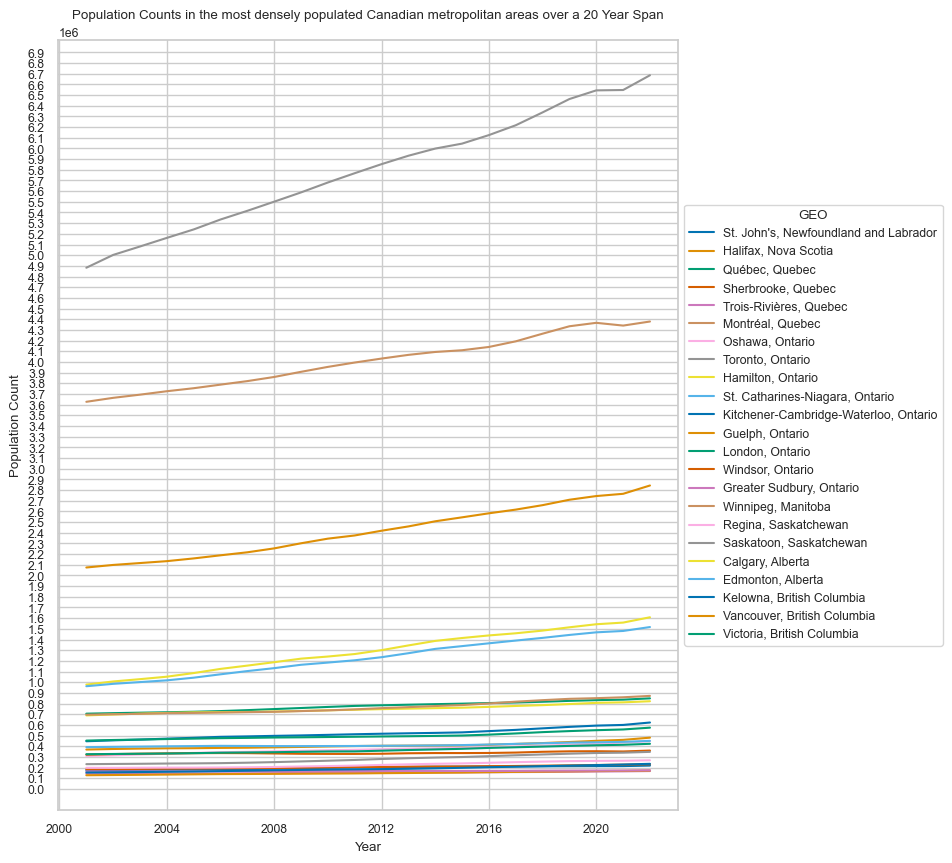

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))

pop = sns.lineplot(x='REF_DATE', y='VALUE', hue='GEO', data=PE_Wrangled_Final_all_ages, palette='colorblind')
plt.yticks(range(0, 7000000, 100000))

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Population Count")
plt.title("Population Counts in the most densely populated Canadian metropolitan areas over a 20 Year Span")
plt.show()

Okay, I have finally managed to visualize the change in population over time for each of the major metropolitan areas, however its hard to infer the actual change as the axis is quite dense to account for the vast differences in population sizes. I think I will instead create a new column for rate of change per year for each area.

In [25]:
rate_change_per_year = pd.DataFrame()
for city in PE_Wrangled_Final_all_ages["GEO"].unique():
    city_list = PE_Wrangled_Final_all_ages.loc[PE_Wrangled_Final_all_ages['GEO'] == city].copy()
    city_list['RATE'] = city_list['VALUE'].pct_change() * 100
    city_list = city_list.dropna()
    rate_change_per_year = pd.concat([rate_change_per_year, city_list], axis=0)
rate_change_per_year

,REF_DATE,GEO,Sex,Age group,UOM,VALUE,RATE
7935,2002-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,177626.0,0.656210
15870,2003-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,179026.0,0.788173
23805,2004-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,181059.0,1.135589
31740,2005-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,181720.0,0.365074
39675,2006-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,183847.0,1.170482
...,...,...,...,...,...,...,...
142485,2018-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,396839.0,1.580382
150420,2019-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,403466.0,1.669947
158355,2020-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,409398.0,1.470260
166290,2021-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,413859.0,1.089649


I also think I should calculate the total rate of change over the 20 year period for each metropolitan area. To do so, I created a new dataframe with a GEO column and a rate_total column and then populated the columns using the values from the GEO column in the wrangled dataset and created the total rate values using a for loop.

In [26]:
import warnings as w
w.filterwarnings("ignore", message="The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.")


total_rate_change = pd.DataFrame(columns=["GEO", "rate_total"])

for city in PE_Wrangled_Final_all_ages["GEO"].unique():

    city_df = PE_Wrangled_Final_all_ages[PE_Wrangled_Final_all_ages["GEO"] == city]

    initial_pop = city_df.iloc[0]["VALUE"]
    final_pop = city_df.iloc[-1]["VALUE"]

    rate = (final_pop - initial_pop) / initial_pop * 100

    total_rate_change = total_rate_change.append({"GEO": city, "rate_total": rate}, ignore_index=True)

total_rate_change = total_rate_change.sort_values('rate_total').reset_index()
total_rate_change = total_rate_change.drop(columns=['index'])
total_rate_change

,GEO,rate_total
0,"Greater Sudbury, Ontario",6.788259
1,"Windsor, Ontario",12.064808
2,"St. Catharines-Niagara, Ontario",14.969478
3,"Trois-Rivières, Quebec",16.979342
4,"Hamilton, Ontario",19.249163
5,"Québec, Quebec",20.358590
6,"Montréal, Quebec",20.737784
7,"St. John's, Newfoundland and Labrador",24.169254
8,"Winnipeg, Manitoba",25.286061
9,"Sherbrooke, Quebec",25.822964


Since the yearly rate of change is technically the derivative of the original data, I believe i can now plot it relative to dates and GEO locations in order to get the differentiated graph which should provide for a better visual than before. 

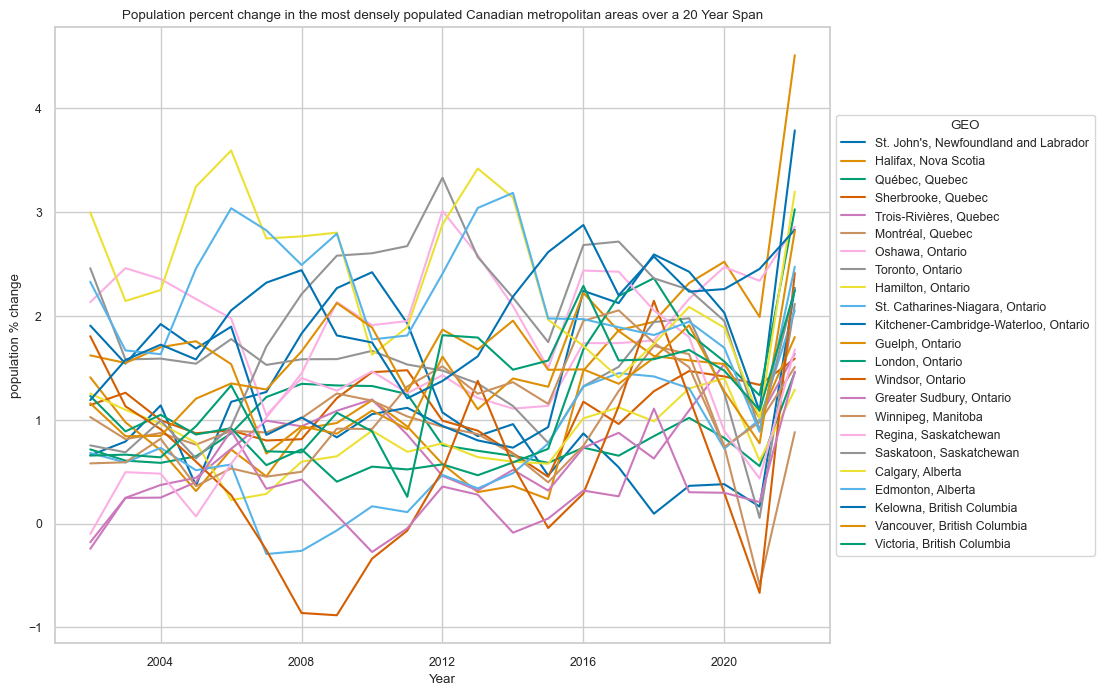

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

pop = sns.lineplot(x='REF_DATE', y='RATE', hue='GEO', data=rate_change_per_year, palette='colorblind')

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("population % change")
plt.title("Population percent change in the most densely populated Canadian metropolitan areas over a 20 Year Span")
plt.show()

Okay, having 20+ lines on one plot is hard to infer still, so I'll now split them up into individual lines using a facetgrid.

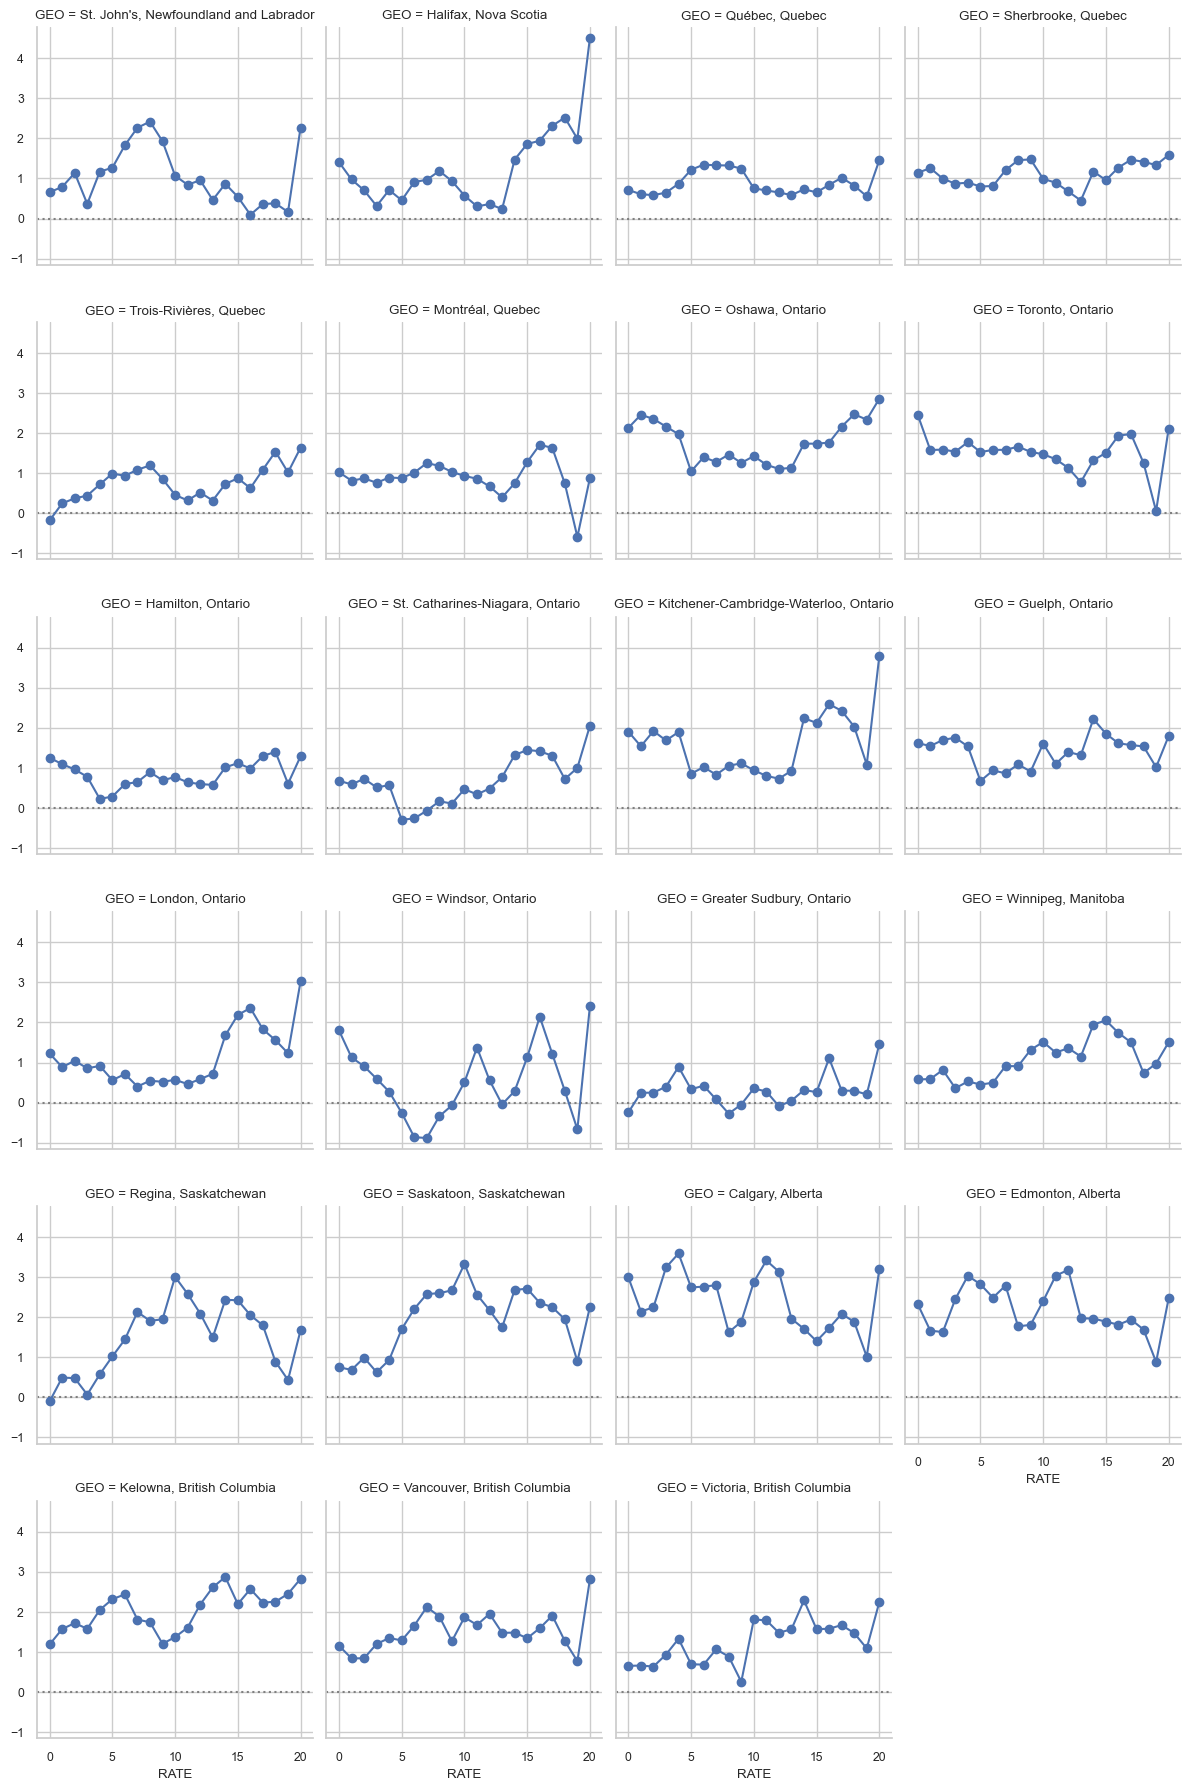

In [28]:
pop_facet = sns.FacetGrid(data=rate_change_per_year, col="GEO", col_wrap=4, height=3, palette="tab20c")
pop_facet.refline(y=0, linestyle=":")
pop_facet.map(plt.plot, "RATE", marker="o")
pop_facet.fig.tight_layout(w_pad=1)
n=None

These look great! Since i have already calculated the total rate of population change over the 20 year period, I will now also plot that on a bar chart to get a clean representation.

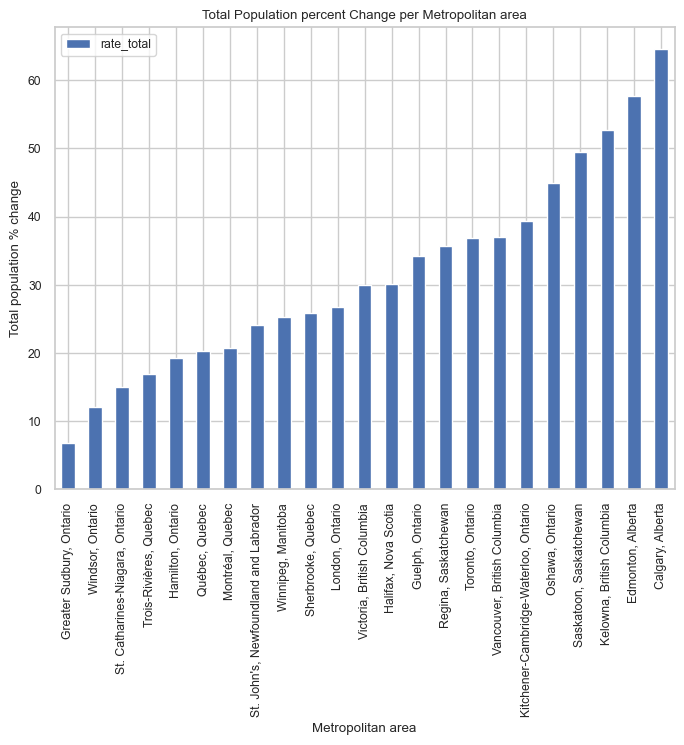

In [29]:
total_rate_change.plot(x="GEO", y="rate_total", kind="bar", figsize=(8, 6))
plt.title("Total Population percent Change per Metropolitan area")
plt.xlabel("Metropolitan area")
plt.ylabel("Total population % change")
plt.show()

Wow! After all this I have finally answered part of my research question! The fastest growing metropolitan area in Canada is Calgary, AB with Edmonton, AB and Kelowna, BC coming in 2nd and 3rd. In the future, I will conduct this same analysis using the wrangled NewHousingPriceIndex and to derive a definitive answer to which metropolitan hub is the most affordable respective to housing cost and inventory. It will be interesting to see if the top three hubs with respect to population growth will also be at the top with respect to cost.